In [114]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn_image as isns

In [117]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Helvetica")
sns.set_context(font_scale=0.8)

In [118]:
data_baseline = xr.open_mfdataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/ph_Baseline_2.6_cropped.nc')

In [119]:
data_oae = xr.open_mfdataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/ph_OAE_2.6_cropped.nc')

In [120]:
sliced_data_baseline = data_baseline.where((3 < data_baseline.nav_lon) & (data_baseline.nav_lon < 4) & (52 < data_baseline.nav_lat) & (data_baseline.nav_lat < 53), drop=True)
sliced_frame_baseline = sliced_data_baseline.sel(time_counter=slice('2090', '2100'))

In [121]:
sliced_data_oae = data_oae.where((3 < data_oae.nav_lon) & (data_oae.nav_lon < 4) & (52 < data_oae.nav_lat) & (data_oae.nav_lat < 53), drop=True)
sliced_frame_oae = sliced_data_oae.sel(time_counter=slice('2090', '2100'))

### DP Seasonal Average of pH

In [122]:
sliced_data_baseline_plot = sliced_data_baseline.ph.mean(dim=('y', 'x'))
sliced_data_oae_plot = sliced_data_oae.ph.mean(dim=('y', 'x'))

In [123]:
sliced_data_baseline_plot = sliced_data_baseline_plot.to_dataset()
sliced_data_oae_plot = sliced_data_oae_plot.to_dataset()

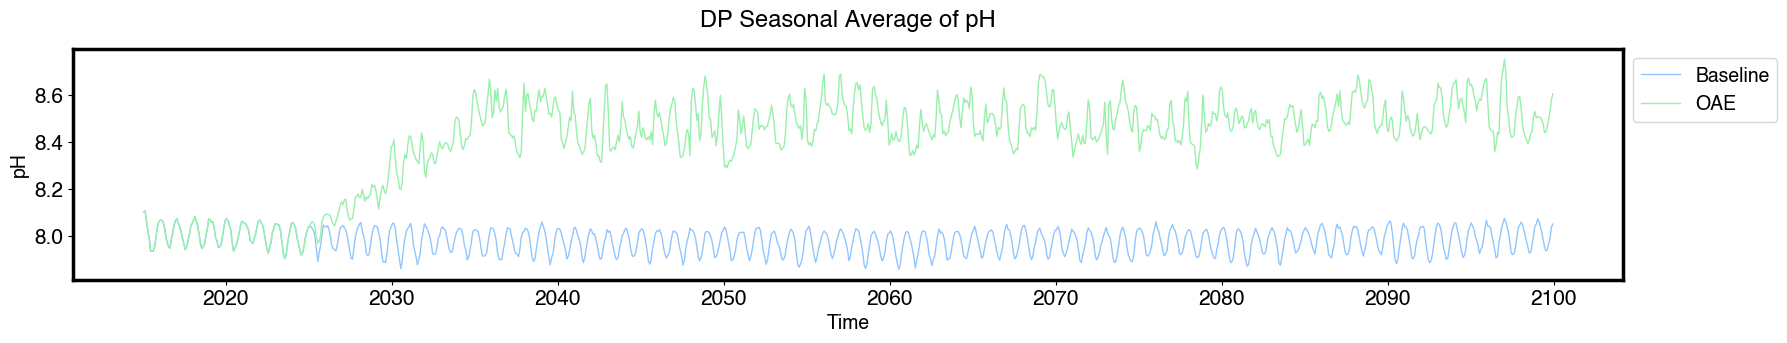

In [124]:
plt.figure(figsize=(20, 3))
plt.plot(sliced_data_baseline_plot.time_counter, sliced_data_baseline_plot.ph, linewidth=2, label = 'Baseline')
plt.plot(sliced_data_oae_plot.time_counter, sliced_data_oae_plot.ph, linewidth=2, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("pH", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('DP Seasonal Average of pH', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

In [125]:
sliced_frame_baseline_plot = sliced_frame_baseline.ph.mean(dim=('y', 'x'))
sliced_frame_oae_plot = sliced_frame_oae.ph.mean(dim=('y', 'x'))

In [126]:
sliced_frame_baseline_plot = sliced_frame_baseline_plot.to_dataset()
sliced_frame_oae_plot = sliced_frame_oae_plot.to_dataset()

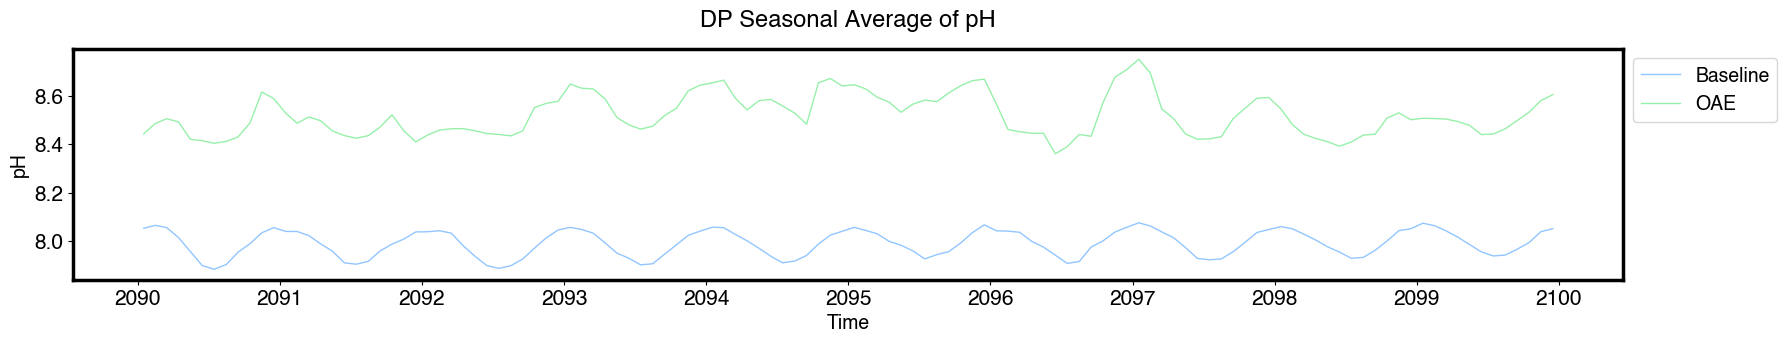

In [127]:
plt.figure(figsize=(20, 3))
plt.plot(sliced_frame_baseline_plot.time_counter, sliced_frame_baseline_plot.ph, linewidth=2, label = 'Baseline')
plt.plot(sliced_frame_oae_plot.time_counter, sliced_frame_oae_plot.ph, linewidth=2, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("pH", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('DP Seasonal Average of pH', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

### Unweighted DP Seasonal Average of pH

In [128]:
start_date = "2090-01-01"
end_date = "2100-01-01"

ph_baseline = sliced_data_baseline["ph"].sel(time_counter=slice(start_date, end_date))

In [129]:
ph_season_summary_baseline = ph_baseline.groupby('time_counter.season').mean('time_counter', skipna=True)
ph_season_mean_all_years_baseline = ph_baseline.resample(time_counter='QS-DEC').mean(keep_attrs=True)
ph_seasonal_mean_baseline = ph_season_mean_all_years_baseline.groupby('time_counter').mean(["y", "x"])

In [130]:
start_date = "2090-01-01"
end_date = "2100-01-01"

ph_oae = sliced_data_oae["ph"].sel(time_counter=slice(start_date, end_date))

In [131]:
ph_season_summary_oae = ph_oae.groupby('time_counter.season').mean('time_counter', skipna=True)
ph_season_mean_all_years_oae = ph_oae.resample(time_counter='QS-DEC').mean(keep_attrs=True)
ph_seasonal_mean_oae = ph_season_mean_all_years_oae.groupby('time_counter').mean(["y", "x"])

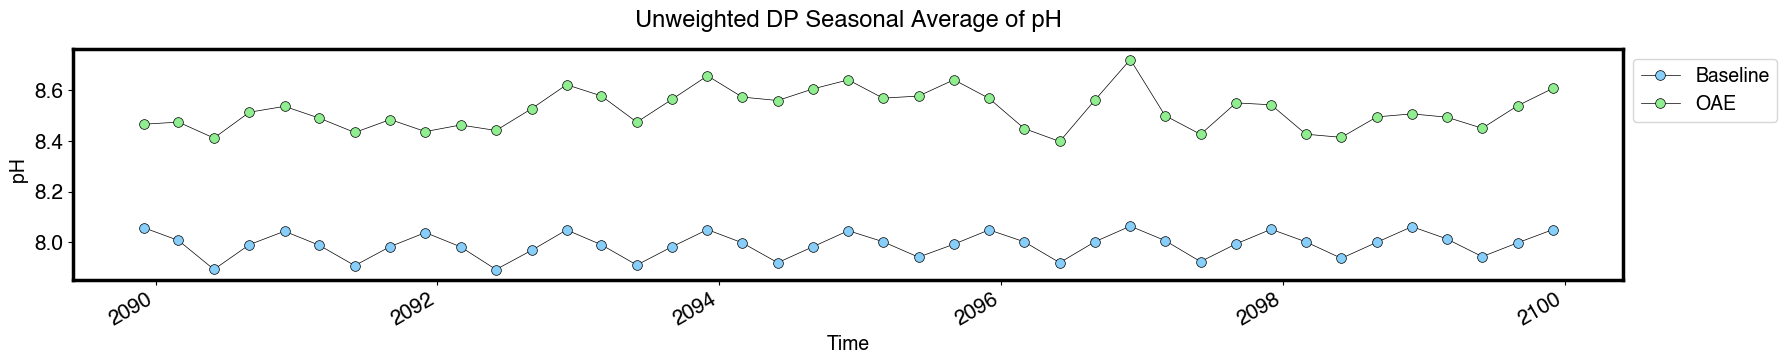

In [132]:
f, ax = plt.subplots(figsize=(20, 3))

ph_seasonal_mean_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

ph_seasonal_mean_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Unweighted DP Seasonal Average of pH", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("pH  ", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted DP Seasonal Average of pH

In [133]:
month_length_baseline = ph_baseline.time_counter.dt.days_in_month
ph_weighted_mean_baseline = ((ph_baseline * month_length_baseline).resample(time_counter='QS-DEC').sum() / month_length_baseline.resample(time_counter='QS-DEC').sum())
ph_weighted_mean_baseline = ph_weighted_mean_baseline.where(ph_weighted_mean_baseline)
ph_weighted_season_baseline = ph_weighted_mean_baseline.groupby('time_counter').mean(["y", "x"])

In [134]:
month_length_oae = ph_oae.time_counter.dt.days_in_month
ph_weighted_mean_oae = ((ph_oae * month_length_oae).resample(time_counter='QS-DEC').sum() / month_length_oae.resample(time_counter='QS-DEC').sum())
ph_weighted_mean_oae = ph_weighted_mean_oae.where(ph_weighted_mean_oae)
ph_weighted_season_oae = ph_weighted_mean_oae.groupby('time_counter').mean(["y", "x"])

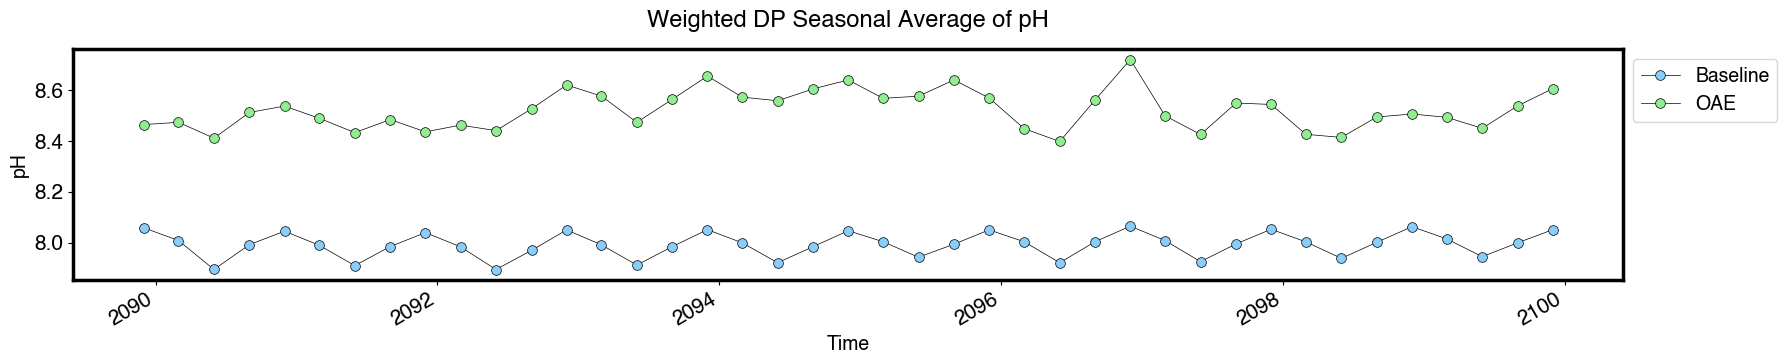

In [135]:
colors = {3: "lightgreen", 6: "orange", 9: "brown", 12: "lightblue"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, ax = plt.subplots(figsize=(20, 3))
ph_weighted_season_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue",
                        markeredgecolor="black", 
                        label = 'Baseline')

ph_weighted_season_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Weighted DP Seasonal Average of pH", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("pH", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted DP Seasonal Average of pH (seasons displayed)

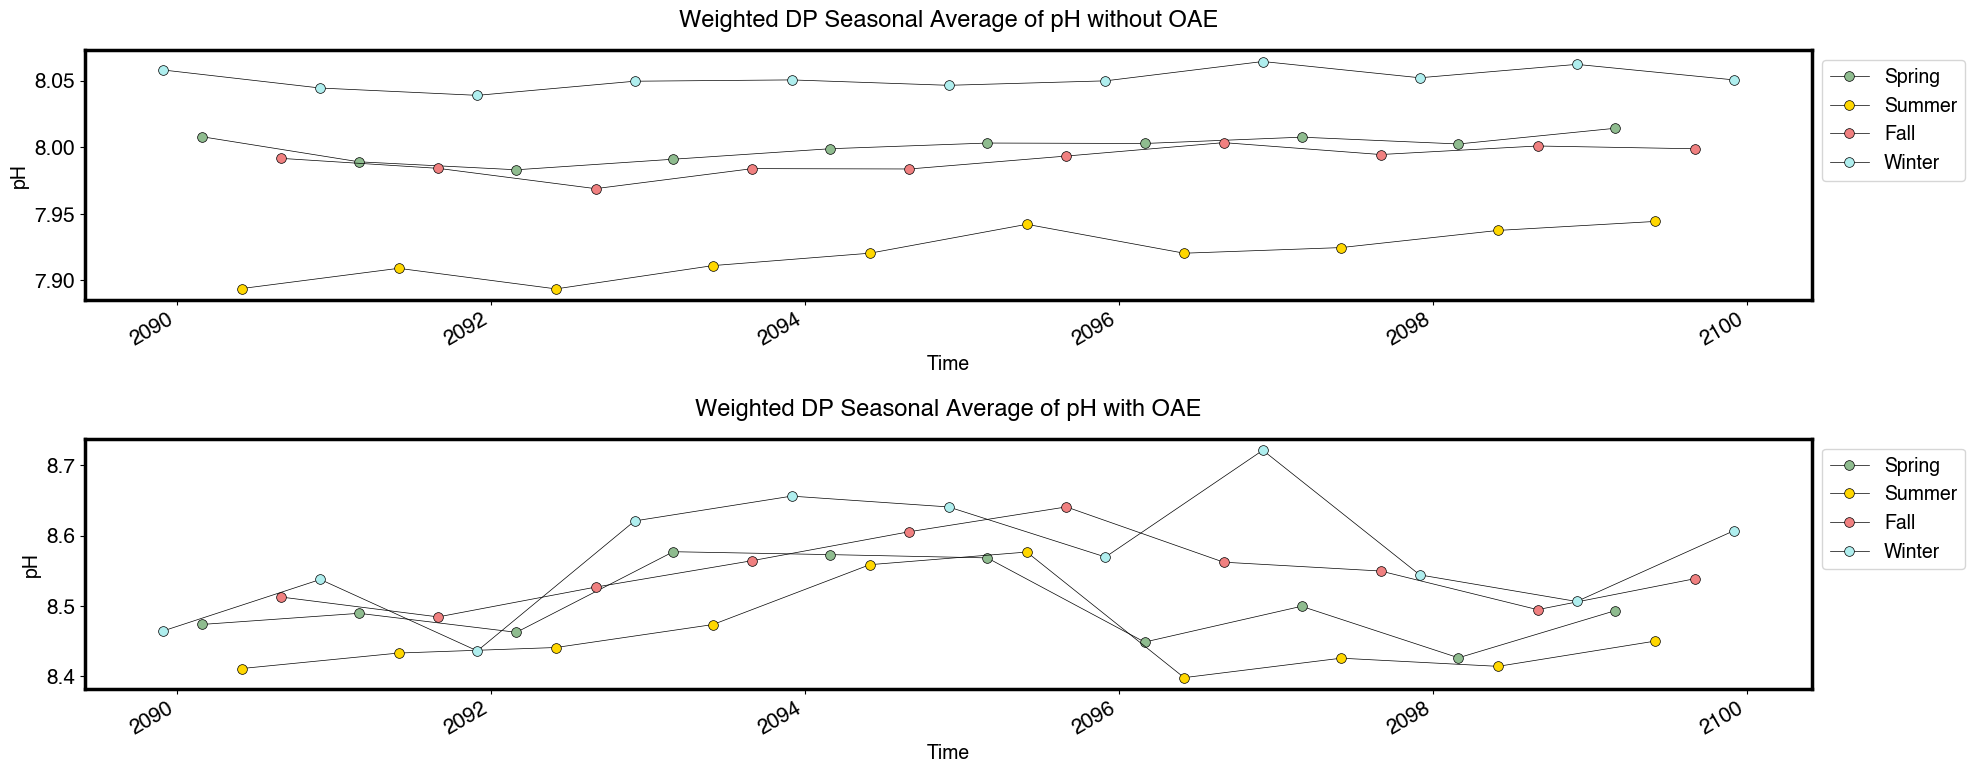

In [136]:
colors = {3: "darkseagreen", 6: "gold", 9: "lightcoral", 12: "paleturquoise"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), sharey=False)
for month, arr in ph_weighted_season_baseline.groupby('time_counter.month'):
    arr.plot(ax=ax1,
             color="black", linewidth=0.5,
             marker="o", markersize=7, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax1.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax1.set_title("Weighted DP Seasonal Average of pH without OAE", fontsize=17, y=1.06)
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('pH', fontsize=14)

for month, arr in ph_weighted_season_oae.groupby('time_counter.month'):
    arr.plot(ax=ax2,
             color="black", linewidth=0.5,
             marker="o", markersize=7, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax2.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax2.set_title("Weighted DP Seasonal Average of pH with OAE", fontname="Helvetica", fontsize=17, y=1.06)
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('pH', fontsize=14)
f.tight_layout()
plt.show()

### Weighted DP Seasonal Average of pH without OAE (seasons displayed)

In [137]:
ph_weighted_baseline = ph_weighted_season_baseline.to_dataframe('ph')
ph_weighted_baseline['Month'] = pd.DatetimeIndex(ph_weighted_baseline.index).month

In [138]:
conditions = [
    (ph_weighted_baseline['Month'] == 3),
    (ph_weighted_baseline['Month'] == 6),
    (ph_weighted_baseline['Month'] == 9),
    (ph_weighted_baseline['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

ph_weighted_baseline['Month'] = np.select(conditions, values)

In [139]:
colors = dict(zip(ph_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

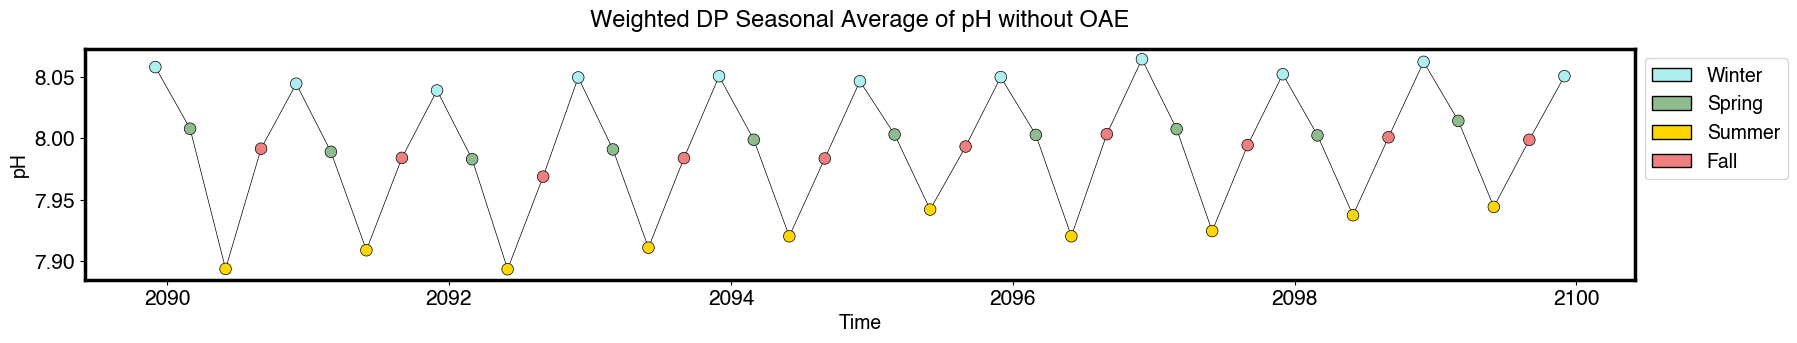

In [140]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(ph_weighted_baseline.index, ph_weighted_baseline.ph, '-', color="black",  linewidth=0.5, markeredgewidth=0.5, zorder=1)
ax.scatter(ph_weighted_baseline.index, ph_weighted_baseline.ph, color=ph_weighted_baseline.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('pH', fontsize=14)
ax.set_title("Weighted DP Seasonal Average of pH without OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### Weighted DP Seasonal Average of pH with OAE (seasons displayed)

In [141]:
ph_weighted_oae = ph_weighted_season_oae.to_dataframe('ph')
ph_weighted_oae['Month'] = pd.DatetimeIndex(ph_weighted_oae.index).month

In [142]:
conditions = [
    (ph_weighted_oae['Month'] == 3),
    (ph_weighted_oae['Month'] == 6),
    (ph_weighted_oae['Month'] == 9),
    (ph_weighted_oae['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

ph_weighted_oae['Month'] = np.select(conditions, values)

In [143]:
colors = dict(zip(ph_weighted_oae.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

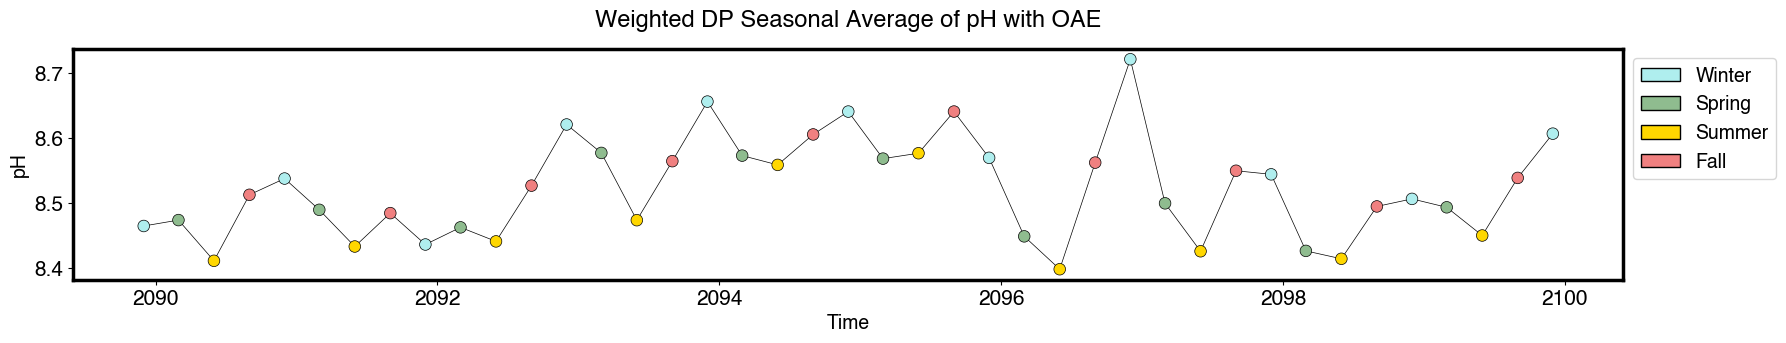

In [144]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(ph_weighted_oae.index, ph_weighted_oae.ph, '-', color="black",  linewidth=0.5, zorder=1)
ax.scatter(ph_weighted_oae.index, ph_weighted_oae.ph, color=ph_weighted_oae.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('pH', fontsize=14)
ax.set_title("Weighted DP Seasonal Average of pH with OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### Weighted DP Seasonal Average of pH (seasons displayed)

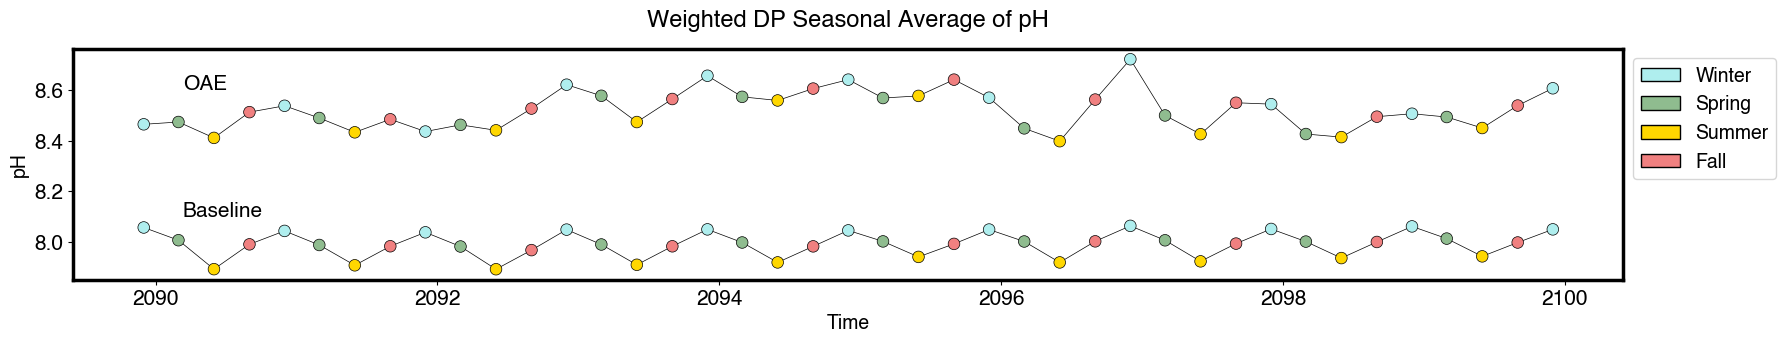

In [145]:
colors = dict(zip(ph_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))
colors = dict(zip(ph_weighted_oae.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(ph_weighted_baseline.index, ph_weighted_baseline.ph, '-', color="black",  linewidth=0.5, zorder=1)
ax.text(43900, 8.1, s='Baseline')
ax.scatter(ph_weighted_baseline.index, ph_weighted_baseline.ph, color=ph_weighted_baseline.Month.map(lambda x: colors[x]), marker='o', edgecolors='black',  linewidth=0.5, s=70)

ax.plot_date(ph_weighted_oae.index, ph_weighted_oae.ph, '-', color="black", linewidth=0.5, zorder=1)
ax.text(43900, 8.6, s='OAE')
ax.scatter(ph_weighted_oae.index, ph_weighted_oae.ph, color=ph_weighted_oae.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('pH', fontsize=14)
ax.set_title("Weighted DP Seasonal Average of pH", fontname="Helvetica", fontsize=17, y=1.06)

#plt.savefig('DPpH_seasonal_mean.png')

pass

### DP Monthly Average of pH

In [146]:
start_date_month = "2090-01-01"
end_date_month = "2100-01-01"

ph_baseline_month = sliced_data_baseline["ph"].sel(time_counter=slice(start_date_month, end_date_month))
ph_monthly_mean_baseline = ph_month_mean_all_years_baseline.groupby('time_counter').mean(["y", "x"])

In [147]:
ph_oae_month = sliced_data_oae["ph"].sel(time_counter=slice(start_date_month, end_date_month))
ph_monthly_mean_oae = ph_month_mean_all_years_oae.groupby('time_counter').mean(["y", "x"])

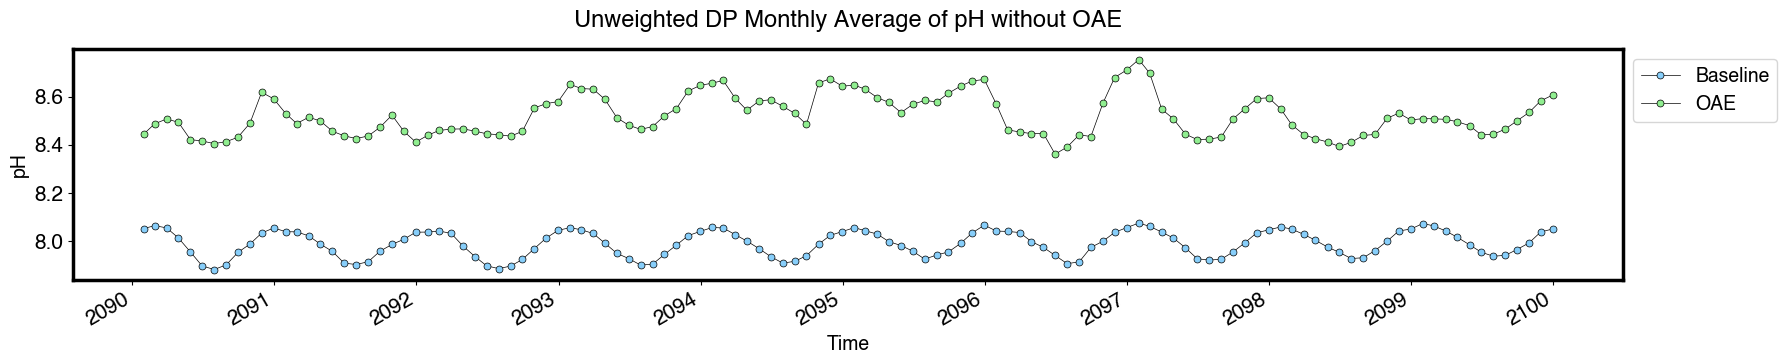

In [148]:
f, ax = plt.subplots(figsize=(20, 3))

ph_monthly_mean_baseline.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

ph_monthly_mean_oae.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Unweighted DP Monthly Average of pH without OAE", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("pH", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### DP Monthly Average of pH without OAE (months displayed)

In [149]:
ph_baseline_monthly = ph_monthly_mean_baseline.to_dataframe('ph')
ph_baseline_monthly['Month'] = pd.DatetimeIndex(ph_baseline_monthly.index).month

In [150]:
conditions = [
    (ph_baseline_monthly['Month'] == 1),
    (ph_baseline_monthly['Month'] == 2),
    (ph_baseline_monthly['Month'] == 3),
    (ph_baseline_monthly['Month'] == 4),
    (ph_baseline_monthly['Month'] == 5),
    (ph_baseline_monthly['Month'] == 6),
    (ph_baseline_monthly['Month'] == 7),
    (ph_baseline_monthly['Month'] == 8),
    (ph_baseline_monthly['Month'] == 9),
    (ph_baseline_monthly['Month'] == 10),
    (ph_baseline_monthly['Month'] == 11),
    (ph_baseline_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

ph_baseline_monthly['Month'] = np.select(conditions, values)

In [151]:
colors = dict(zip(ph_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

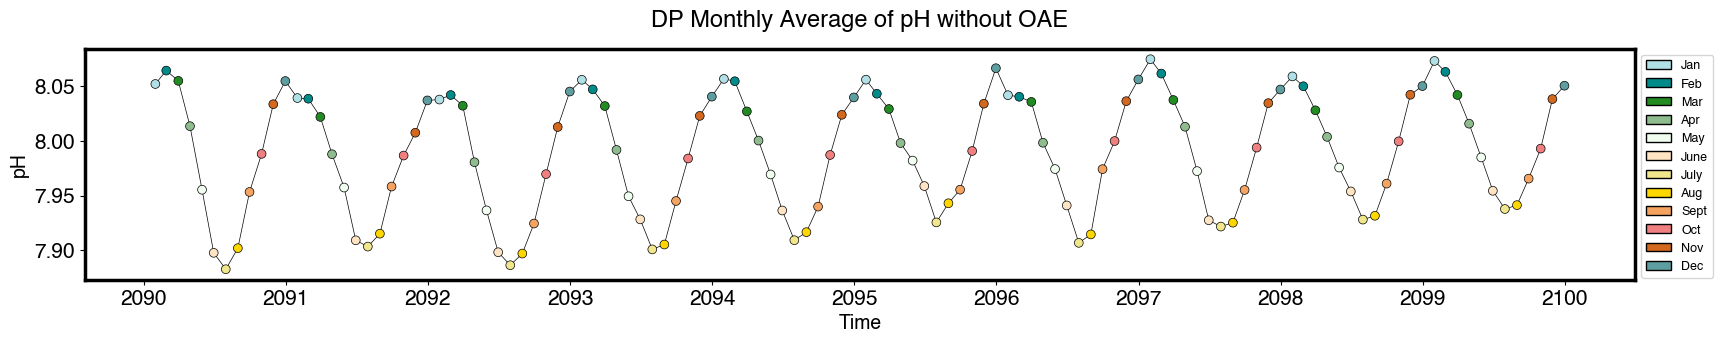

In [152]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(ph_baseline_monthly.index, ph_baseline_monthly.ph, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(ph_baseline_monthly.index, ph_baseline_monthly.ph, color=ph_baseline_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('pH', fontsize=14)
ax.set_title("DP Monthly Average of pH without OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### DP Monthly Average of pH with OAE (months displayed)

In [153]:
ph_oae_monthly = ph_monthly_mean_oae.to_dataframe('ph')
ph_oae_monthly['Month'] = pd.DatetimeIndex(ph_oae_monthly.index).month

In [154]:
conditions = [
    (ph_oae_monthly['Month'] == 1),
    (ph_oae_monthly['Month'] == 2),
    (ph_oae_monthly['Month'] == 3),
    (ph_oae_monthly['Month'] == 4),
    (ph_oae_monthly['Month'] == 5),
    (ph_oae_monthly['Month'] == 6),
    (ph_oae_monthly['Month'] == 7),
    (ph_oae_monthly['Month'] == 8),
    (ph_oae_monthly['Month'] == 9),
    (ph_oae_monthly['Month'] == 10),
    (ph_oae_monthly['Month'] == 11),
    (ph_oae_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

ph_oae_monthly['Month'] = np.select(conditions, values)

In [155]:
colors = dict(zip(ph_oae_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

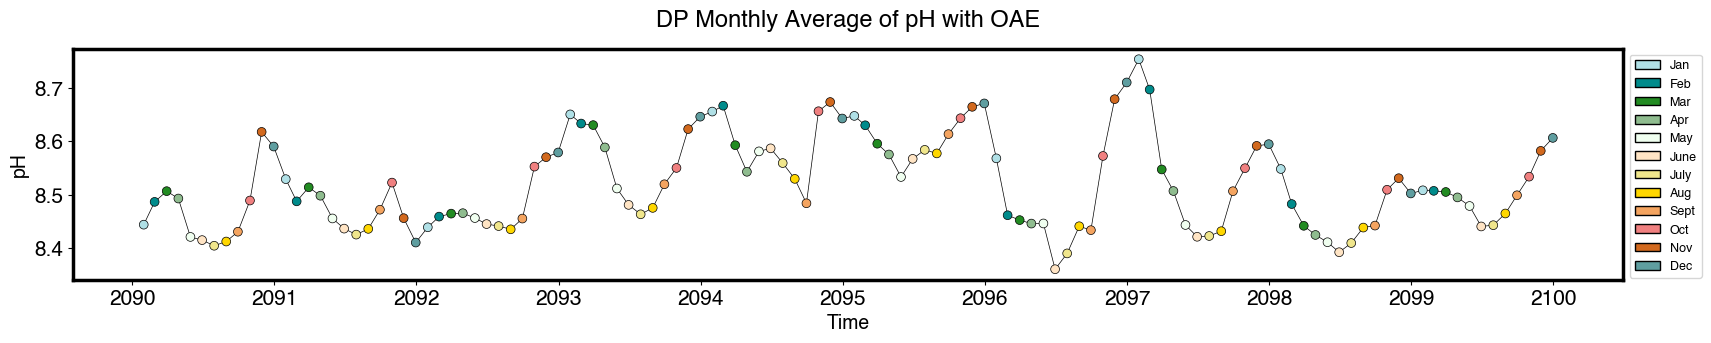

In [156]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(ph_oae_monthly.index, ph_oae_monthly.ph, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(ph_oae_monthly.index, ph_oae_monthly.ph, color=ph_oae_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('pH', fontsize=14)
ax.set_title("DP Monthly Average of pH with OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### DP Monthly Average of pH (months displayed)

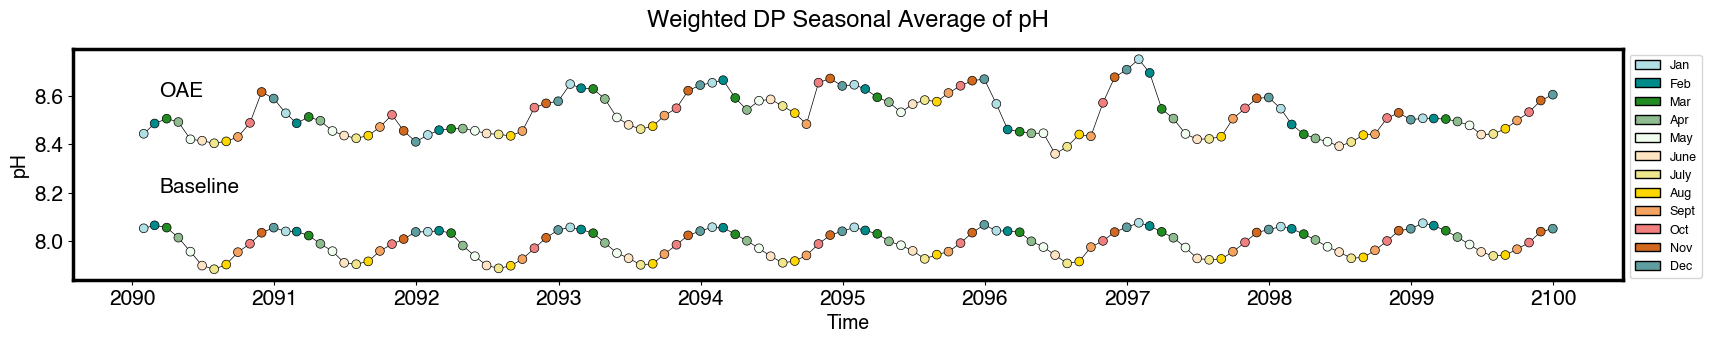

In [157]:
colors = dict(zip(ph_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(ph_baseline_monthly.index, ph_baseline_monthly.ph, '-', color="black", linewidth=0.5, zorder=1)
ax.text(43900, 8.2, s='Baseline')
ax.scatter(ph_baseline_monthly.index, ph_baseline_monthly.ph, color=ph_baseline_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

ax.plot_date(ph_oae_monthly.index, ph_oae_monthly.ph, '-', color="black", linewidth=0.5, zorder=1)
ax.text(43900, 8.6, s='OAE')
ax.scatter(ph_oae_monthly.index, ph_oae_monthly.ph, color=ph_oae_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('pH', fontsize=14)
ax.set_title("Weighted DP Seasonal Average of pH", fontsize=17, y=1.06)

#plt.savefig('DPpH_monthly_mean.png')

pass

### Δ pH between Baseline and OAE

In [158]:
delta_ph = ph_oae_monthly.ph - ph_baseline_monthly.ph

In [159]:
delta_ph = delta_ph.to_xarray()

In [160]:
delta_ph = delta_ph.to_dataframe('ph')
delta_ph['Month'] = pd.DatetimeIndex(delta_ph.index).month

In [161]:
conditions = [
    (delta_ph['Month'] == 1),
    (delta_ph['Month'] == 2),
    (delta_ph['Month'] == 3),
    (delta_ph['Month'] == 4),
    (delta_ph['Month'] == 5),
    (delta_ph['Month'] == 6),
    (delta_ph['Month'] == 7),
    (delta_ph['Month'] == 8),
    (delta_ph['Month'] == 9),
    (delta_ph['Month'] == 10),
    (delta_ph['Month'] == 11),
    (delta_ph['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

delta_ph['Month'] = np.select(conditions, values)

In [162]:
colors = dict(zip(delta_ph.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

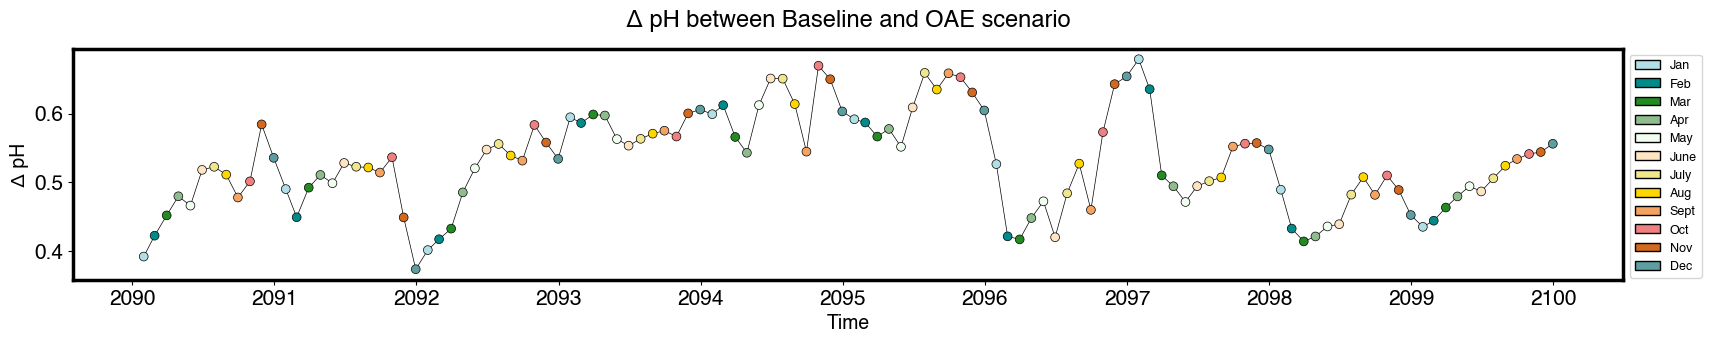

In [163]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(delta_ph.index, delta_ph.ph, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(delta_ph.index, delta_ph.ph, color=delta_ph.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Δ pH', fontsize=14)
ax.set_title("Δ pH between Baseline and OAE scenario", fontname="Helvetica", fontsize=17, y=1.06)

#plt.savefig('DPph_Δ.png')

pass

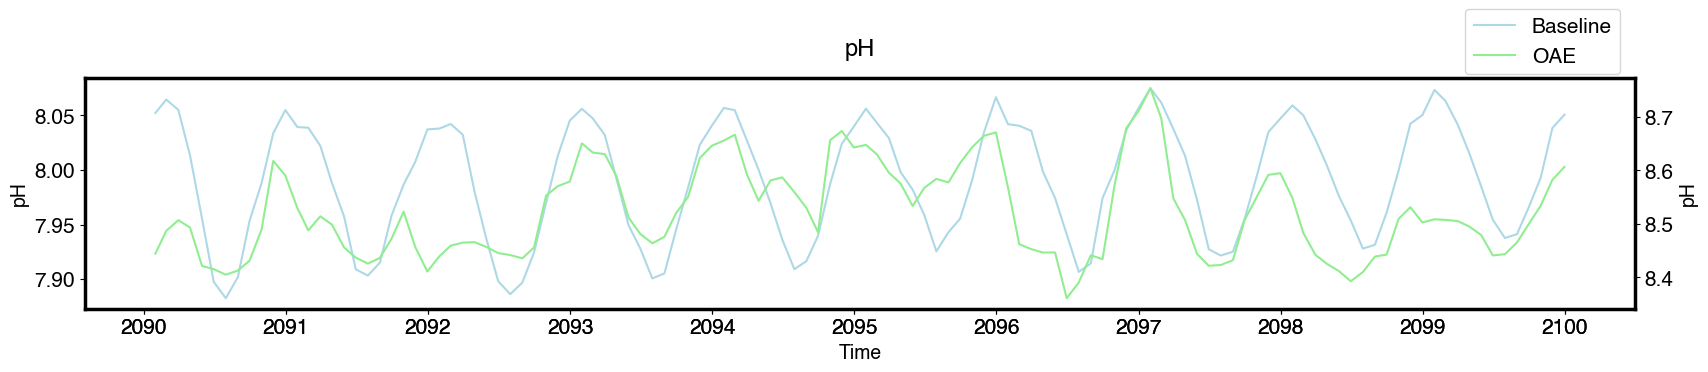

In [164]:
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(ph_baseline_monthly.index, ph_baseline_monthly.ph, linewidth=2.5, color="lightblue", label = 'Baseline', zorder=1)
ax.set_ylabel('pH', fontsize=14)

ax2.plot(ph_oae_monthly.index, ph_oae_monthly.ph, linewidth=2.5, color="lightgreen", label = 'OAE', zorder=1)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('pH', fontsize=14) 

plt.xlabel("Time", fontsize=14)

plt.title('pH', fontname="Helvetica", fontsize=17, y=1.06)
fig.legend(bbox_to_anchor=(0.81, 1), loc='center left')
plt.show()